CASESTUDY 1- DATA PREPROCESSING

In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [455]:
#Reading the data and finding the missing values
testdata=pd.read_csv('/content/test_loan.csv')
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [456]:
testdata.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [457]:
testdata.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

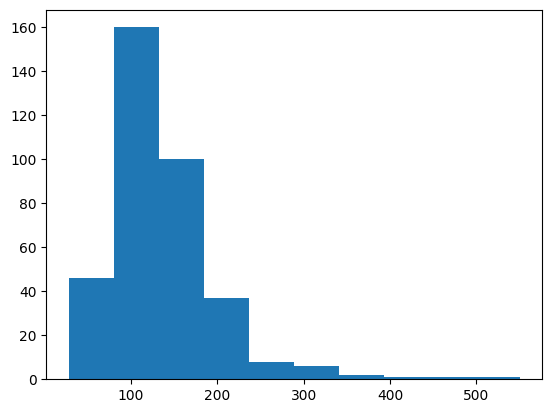

In [458]:
# Handling the missing values in the numerical variables-LoanAmount,Loan_Amount_Term,Credit_History
testdata['LoanAmount'].unique()
testdata['LoanAmount'].value_counts()
#testdata['LoanAmount'].head()
plt.hist(testdata['LoanAmount'])
plt.show()

In [459]:
testdata['LoanAmount']=testdata['LoanAmount'].fillna(testdata['LoanAmount'].mean())# mean since right skewed
testdata.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [460]:
testdata['Loan_Amount_Term'].unique()
testdata['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [461]:
testdata['Loan_Amount_Term']=testdata['Loan_Amount_Term'].fillna(360).astype(int) #since the value 360 is repeating
testdata.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [462]:
testdata['Credit_History'].unique()
testdata['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [463]:
testdata['Credit_History']=testdata['Credit_History'].fillna(1).astype(int) #since the value 1 is repeating more
testdata.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [464]:
testdata.shape
testdata['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [465]:
# since Dependents contain values with + it is replaced
testdata['Dependents']=testdata['Dependents'].str.replace('+','')
testdata['Dependents'] = pd.to_numeric(testdata['Dependents'], errors='coerce').fillna(0).astype(int)

<ipython-input-465-dc3b5686931e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  testdata['Dependents']=testdata['Dependents'].str.replace('+','')


In [466]:
#Handling the missing values in categorical variables - Gender,Dependents,Self_Employed
testdata['LoanAmount']=testdata['LoanAmount'].fillna(testdata['LoanAmount'].mean())
testdata['Gender'].unique()
testdata['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [467]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True) #replacing NaN with mode or most repeating value
testdata.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [468]:
testdata['Dependents'].unique()
testdata['Dependents'].value_counts()

0    210
2     59
1     58
3     40
Name: Dependents, dtype: int64

In [469]:
testdata['Self_Employed'].unique()
testdata['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [470]:
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace=True)
testdata.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [471]:
# OUTLIER TRIMMING USING IQR METHOD
testdata.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.806540,4805.599455,1569.577657,136.132597,342.822888,0.839237
std,1.065177,4910.685399,2334.232099,60.946040,64.658402,0.367814
min,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000
25%,0.000000,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,0.000000,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,2.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,3.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000


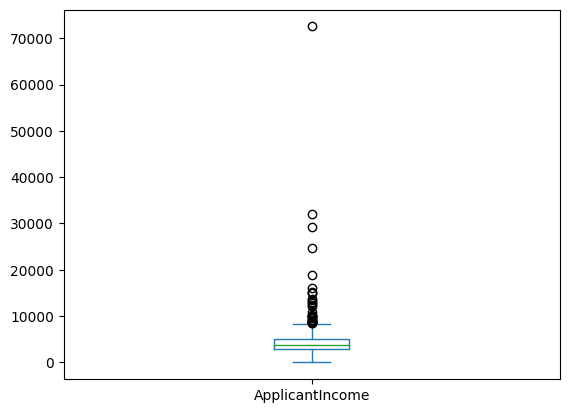

In [472]:
#handling the outliers using IQR in columns ApplicantIncome,CoapplicantIncome,LoanAmount
# column Credit_History is not taken since it has only 2 values
testdata['ApplicantIncome'].plot(kind="box")
plt.show()

In [473]:
# finding Q1,Q2,Q3,IQR, upper and lower limit
Q1b=testdata['ApplicantIncome'].quantile(0.25)
Q2b=testdata['ApplicantIncome'].quantile(0.5)
Q3b=testdata['ApplicantIncome'].quantile(0.75)
IQRb=Q3b-Q1b
upperb=Q3b+(1.5*IQRb)
lowerb=Q1b-(1.5*IQRb)
print(upperb,lowerb)

8354.0 -430.0


In [474]:
#finding the index of outiers
testdata[(testdata['ApplicantIncome']<lowerb)|(testdata['ApplicantIncome']>upperb)].index

Int64Index([  8,  13,  18,  81,  83,  91,  98, 124, 143, 144, 145, 147, 179,
            184, 187, 188, 194, 200, 230, 247, 263, 272, 279, 283, 284, 285,
            302, 323, 331, 350, 360, 366],
           dtype='int64')

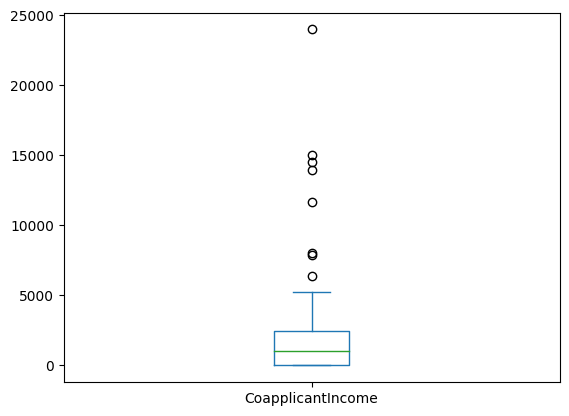

In [475]:
# Ignoring the outliers since the column 'ApplicantIncome'has more number of outliers
# dropping these many rows will affect the outcome
testdata['CoapplicantIncome'].plot(kind="box")
plt.show()

In [476]:
# finding Q1,Q2,Q3,IQR, upper and lower limit
Q1c=testdata['CoapplicantIncome'].quantile(0.25)
Q2c=testdata['CoapplicantIncome'].quantile(0.5)
Q3c=testdata['CoapplicantIncome'].quantile(0.75)
IQRc=Q3c-Q1c
upperc=Q3c+(1.5*IQRc)
lowerc=Q1c-(1.5*IQRc)
print(upperc,lowerc)

6076.25 -3645.75


In [477]:
testdata[(testdata['CoapplicantIncome']<lowerc) | (testdata['CoapplicantIncome']>upperc)].index

Int64Index([18, 25, 85, 123, 230, 237, 284, 351], dtype='int64')

In [478]:
#Dropping the values in the mentioned index
testdata=testdata.drop([18, 25, 85, 123, 230, 237, 284, 351])

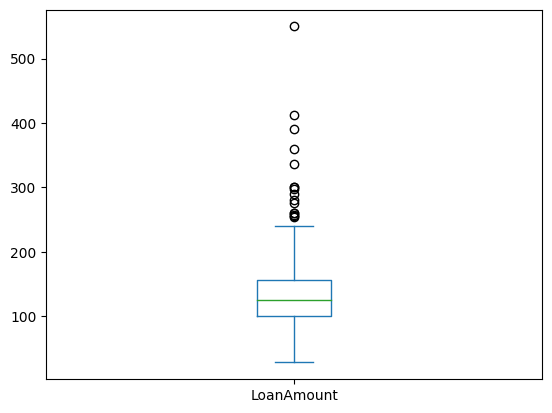

In [479]:
testdata['LoanAmount'].plot(kind="box")
plt.show()

In [480]:
Q1a=testdata['LoanAmount'].quantile(0.25)
Q2a=testdata['LoanAmount'].quantile(0.5)
Q3a=testdata['LoanAmount'].quantile(0.75)
IQRa=Q3a-Q1a
uppera=Q3a+(1.5*IQRa)
lowera=Q1a-(1.5*IQRa)
print(uppera,lowera)

240.0 16.0


In [481]:
testdata[(testdata['LoanAmount']<lowera) | (testdata['LoanAmount']>uppera)].index

Int64Index([8, 24, 27, 81, 83, 91, 96, 124, 143, 144, 189, 194, 285, 331, 345,
            350],
           dtype='int64')

In [482]:
testdata=testdata.drop([8, 24, 27, 81, 83, 91, 96, 124, 143, 144, 189, 194, 285, 331, 345,
            350])

In [483]:
testdata['Loan_ID'] = pd.to_numeric(testdata['Loan_ID'], errors='coerce').fillna(0).astype(int)
testdata.dtypes

Loan_ID                int64
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
dtype: object

In [484]:
testdata['Property_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [485]:
# ENCODING THE CATEGORICAL VARIABLES - Gender,Married,Education,Self_Employed,Property_Area
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
testdata['Gender']=le.fit_transform(testdata['Gender'])
testdata['Self_Employed']=le.fit_transform(testdata['Self_Employed'])
testdata['Married']=le.fit_transform(testdata['Married'])
testdata['Property_Area']=le.fit_transform(testdata['Property_Area'])
testdata['Education']=le.fit_transform(testdata['Education'])
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360,1,2
1,0,1,1,1,0,0,3076,1500,126.0,360,1,2
2,0,1,1,2,0,0,5000,1800,208.0,360,1,2
3,0,1,1,2,0,0,2340,2546,100.0,360,1,2
4,0,1,0,0,1,0,3276,0,78.0,360,1,2


In [486]:
testdata.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area          int64
dtype: object

In [487]:
testdata.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,343.0,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,0.0,0.801749,0.623907,0.778426,0.241983,0.102041,4317.370262,1328.169096,126.380942,343.510204,0.836735,1.081633
std,0.0,0.399264,0.485112,1.052927,0.428909,0.303144,2890.097360,1439.353853,40.839709,63.459102,0.370148,0.815985
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,2823.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,3719.000000,1000.000000,125.000000,360.000000,1.000000,1.000000
75%,0.0,1.000000,1.000000,2.000000,0.000000,0.000000,4825.500000,2372.000000,150.000000,360.000000,1.000000,2.000000
max,0.0,1.000000,1.000000,3.000000,1.000000,1.000000,29167.000000,5272.000000,240.000000,480.000000,1.000000,2.000000


In [488]:
# SCALING- LoanAmount,ApplicantIncome,CoapplicantIncome
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
testdata.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount']]=ssc.fit_transform(testdata[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,0.486032,-0.924102,-0.401689,360,1,2
1,0,1,1,1,0,0,-0.430153,0.119555,-0.009341,360,1,2
2,0,1,1,2,0,0,0.236541,0.328286,2.001442,360,1,2
3,0,1,1,2,0,0,-0.685188,0.847332,-0.646907,360,1,2
4,0,1,0,0,1,0,-0.360850,-0.924102,-1.186385,360,1,2


In [489]:
#REPEATING THE SAME PREPROCESSING STEPS ON TRAIN DATA
traindata=pd.read_csv('/content/train_loan.csv')
traindata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [490]:
traindata.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [491]:
traindata.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

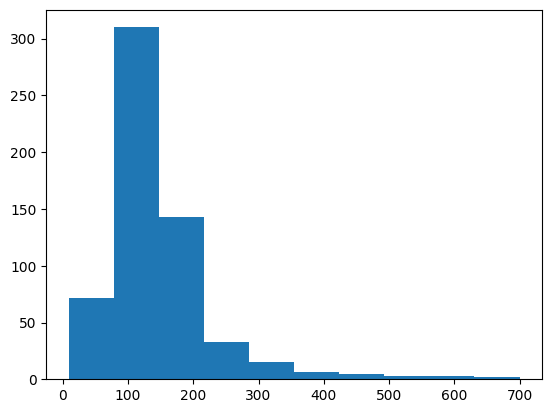

In [492]:
# Handling the missing values in the numerical variables-LoanAmount,Loan_Amount_Term,Credit_History
traindata['LoanAmount'].unique()
traindata['LoanAmount'].value_counts()
plt.hist(traindata['LoanAmount'])
plt.show()

In [493]:
traindata['LoanAmount']=traindata['LoanAmount'].fillna(traindata['LoanAmount'].mean())
testdata['Loan_Amount_Term'].unique()
testdata['Loan_Amount_Term'].value_counts()
traindata['Loan_Amount_Term']=traindata['Loan_Amount_Term'].fillna(360).astype(int)
traindata['Credit_History']=traindata['Credit_History'].fillna(1).astype(int)
traindata.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [494]:
traindata.shape
traindata['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [495]:
traindata['Dependents']=traindata['Dependents'].str.replace('+','')
traindata['Dependents'] = pd.to_numeric(traindata['Dependents'], errors='coerce').fillna(0).astype(int)


<ipython-input-495-30888b190f8c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  traindata['Dependents']=traindata['Dependents'].str.replace('+','')


In [496]:
traindata['LoanAmount']=traindata['LoanAmount'].fillna(traindata['LoanAmount'].mean())
traindata['Credit_History']=traindata['Credit_History'].fillna(1).astype(int)
traindata['Gender'].fillna(traindata['Gender'].mode()[0], inplace=True)
traindata['Married'].fillna(traindata['Married'].mode()[0], inplace=True)
traindata['Dependents'].fillna(traindata['Dependents'].mode()[0], inplace=True)
traindata['Self_Employed'].fillna(traindata['Self_Employed'].mode()[0], inplace=True)
traindata.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

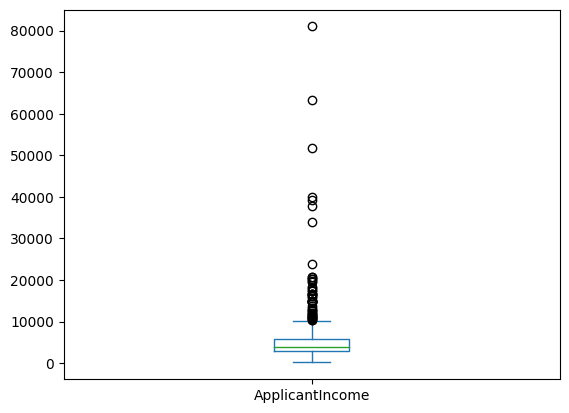

In [497]:
# OUTLIER TRIMMING USING IQR METHOD
testdata.describe()
#handling the outliers using IQR in columns ApplicantIncome,CoapplicantIncome,LoanAmount
# column Credit_History is not taken since it has only 2 values
traindata['ApplicantIncome'].plot(kind="box")
plt.show()

In [498]:
# finding Q1,Q2,Q3,IQR, upper and lower limit
Q1bt=traindata['ApplicantIncome'].quantile(0.25)
Q2bt=traindata['ApplicantIncome'].quantile(0.5)
Q3bt=traindata['ApplicantIncome'].quantile(0.75)
IQRbt=Q3bt-Q1bt
upperbt=Q3bt+(1.5*IQRbt)
lowerbt=Q1bt-(1.5*IQRbt)
print(upperbt,lowerbt)

10171.25 -1498.75


In [499]:
#finding the index of outiers
traindata[(traindata['ApplicantIncome']<lowerbt)|(traindata['ApplicantIncome']>upperbt)].index

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

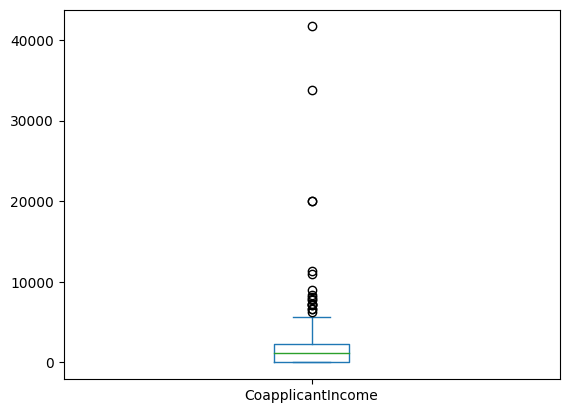

In [500]:
# Ignoring the outliers since the column 'ApplicantIncome'has more number of outliers
# dropping these many rows will affect the outcome
traindata['CoapplicantIncome'].plot(kind="box")
plt.show()

In [501]:
# finding Q1,Q2,Q3,IQR, upper and lower limit
Q1ct=traindata['CoapplicantIncome'].quantile(0.25)
Q2ct=traindata['CoapplicantIncome'].quantile(0.5)
Q3ct=traindata['CoapplicantIncome'].quantile(0.75)
IQRct=Q3ct-Q1ct
upperct=Q3ct+(1.5*IQRct)
lowerct=Q1ct-(1.5*IQRct)
print(upperct,lowerct)

5743.125 -3445.875


In [502]:
traindata[(traindata['CoapplicantIncome']<lowerct) | (traindata['CoapplicantIncome']>upperct)].index

Int64Index([  9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444,
            506, 513, 523, 581, 600],
           dtype='int64')

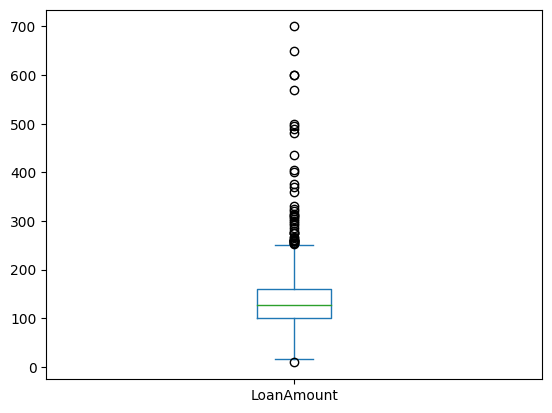

In [503]:
#Dropping the values in the mentioned index
traindata=traindata.drop([9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444,
            506, 513, 523, 581, 600])
traindata['LoanAmount'].plot(kind="box")
plt.show()

In [504]:
Q1at=traindata['LoanAmount'].quantile(0.25)
Q2at=traindata['LoanAmount'].quantile(0.5)
Q3at=traindata['LoanAmount'].quantile(0.75)
IQRat=Q3at-Q1at
upperat=Q3at+(1.5*IQRat)
lowerat=Q1at-(1.5*IQRat)
print(upperat,lowerat)

250.0 10.0


In [505]:
traindata[(traindata['LoanAmount']<lowerat) | (traindata['LoanAmount']>upperat)].index

Int64Index([  5,  21,  34,  54,  65,  67,  83, 119, 126, 130, 155, 159, 161,
            171, 183, 233, 236, 255, 258, 260, 278, 308, 324, 325, 333, 348,
            351, 369, 381, 391, 409, 432, 487, 514, 525, 536, 557, 561, 564,
            568, 572, 592, 594, 604, 611],
           dtype='int64')

In [506]:
traindata=traindata.drop([5,  21,  34,  54,  65,  67,  83, 119, 126, 130, 155, 159, 161,
            171, 183, 233, 236, 255, 258, 260, 278, 308, 324, 325, 333, 348,
            351, 369, 381, 391, 409, 432, 487, 514, 525, 536, 557, 561, 564,
            568, 572, 592, 594, 604, 611])

In [507]:
traindata['Loan_ID'] = pd.to_numeric(traindata['Loan_ID'], errors='coerce').fillna(0).astype(int)
traindata.dtypes

Loan_ID                int64
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

In [508]:
traindata['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [509]:
# ENCODING THE CATEGORICAL VARIABLES - Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
traindata['Gender']=le.fit_transform(traindata['Gender'])
traindata['Self_Employed']=le.fit_transform(traindata['Self_Employed'])
traindata['Married']=le.fit_transform(traindata['Married'])
traindata['Property_Area']=le.fit_transform(traindata['Property_Area'])
traindata['Education']=le.fit_transform(traindata['Education'])
traindata['Loan_Status']=le.fit_transform(traindata['Loan_Status'])
traindata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360,1,2,1
1,0,1,1,1,0,0,4583,1508.0,128.000000,360,1,0,0
2,0,1,1,0,0,1,3000,0.0,66.000000,360,1,2,1
3,0,1,1,0,1,0,2583,2358.0,120.000000,360,1,2,1
4,0,1,0,0,0,0,6000,0.0,141.000000,360,1,2,1


In [510]:
traindata.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
dtype: object

In [511]:
traindata.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,551.0,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,0.0,0.813067,0.644283,0.705989,0.241379,0.127042,4565.081670,1280.647768,126.352210,342.141561,0.852995,1.027223,0.696915
std,0.0,0.390212,0.479165,0.980139,0.428309,0.333322,3430.109862,1402.571712,42.709741,65.666277,0.354433,0.784615,0.460009
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.000000
25%,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,2786.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,3675.000000,1131.000000,124.000000,360.000000,1.000000,1.000000,1.000000
75%,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,5145.000000,2166.500000,151.500000,360.000000,1.000000,2.000000,1.000000
max,0.0,1.000000,1.000000,3.000000,1.000000,1.000000,39147.000000,5701.000000,250.000000,480.000000,1.000000,2.000000,1.000000


In [512]:
# SCALING- LoanAmount,ApplicantIncome,CoapplicantIncome
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
traindata.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount']]=ssc.fit_transform(traindata[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
traindata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.374648,-0.913901,0.470108,360,1,2,1
1,0,1,1,1,0,0,0.005229,0.162244,0.038616,360,1,0,0
2,0,1,1,0,0,1,-0.456692,-0.913901,-1.414362,360,1,2,1
3,0,1,1,0,1,0,-0.578373,0.768824,-0.148865,360,1,2,1
4,0,1,0,0,0,0,0.418710,-0.913901,0.343273,360,1,2,1
